# KNN Classification on Loan Dataset


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the preprocessed dataset
csv_path = "../../data/loan-10k-preprocessed.csv"
df = pd.read_csv(csv_path)
print("Loaded shape:", df.shape)
df.head()


Loaded shape: (10000, 167)


,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,pymnt_plan,...,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,-0.509891,-0.118577,-0.118577,-0.118519,0.0,-0.881789,-0.027257,-0.750,0.234043,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.347313,1.569170,1.569170,1.562469,1.0,1.319489,1.471463,-0.625,0.212766,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.296766,-0.316206,-0.316206,-0.316049,1.0,1.161342,-0.373943,-0.750,-0.711064,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.897144,0.494071,0.494071,0.493827,0.0,0.252396,0.846278,0.375,-0.453191,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.183088,0.869565,0.869565,0.869136,0.0,0.361022,1.332341,-0.625,0.319149,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
# Separate features and target
if 'grade' not in df.columns:
    raise KeyError("Target column 'grade' not found in the data")

X = df.drop(columns=['grade'])
y = df['grade']

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Feature matrix shape: (10000, 166)
Target distribution:
 grade
2    2989
1    2881
0    1821
3    1449
4     621
5     182
6      57
Name: count, dtype: int64


In [ ]:
k_values = [3, 4, 5, 6, 7]

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X, y)

results = []
knn_models = {}
conf_matrices = {}
class_reports = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    y_pred = model.predict(X)

knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X, y)

knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X, y)



,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


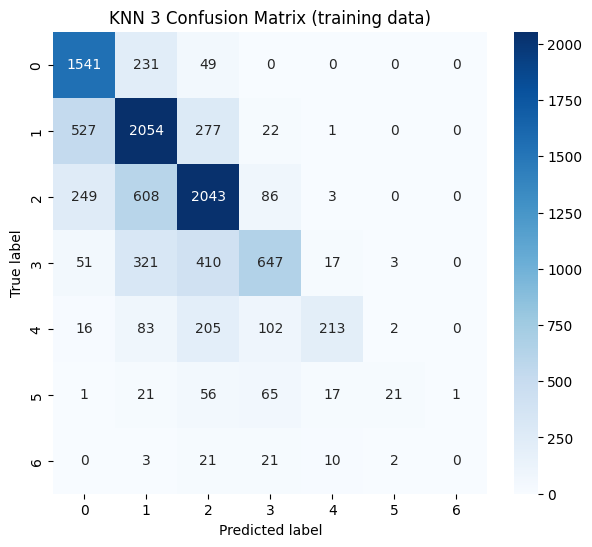

KNN3 Classification report (training data):
              precision    recall  f1-score   support

           0       0.65      0.85      0.73      1821
           1       0.62      0.71      0.66      2881
           2       0.67      0.68      0.68      2989
           3       0.69      0.45      0.54      1449
           4       0.82      0.34      0.48       621
           5       0.75      0.12      0.20       182
           6       0.00      0.00      0.00        57

    accuracy                           0.65     10000
   macro avg       0.60      0.45      0.47     10000
weighted avg       0.66      0.65      0.64     10000



In [ ]:

y_pred = knn3.predict(X)
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn3.classes_, yticklabels=knn3.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('KNN 3 Confusion Matrix (training data)')
plt.show()

print("KNN3 Classification report (training data):")
print(classification_report(y, y_pred))

